# Import librabries

In [1]:
#Importing basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Importing sklearn modules
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve,accuracy_score
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Read the dataset

In [2]:
df = pd.read_excel('E:\Lam Nhut Thinh\Machine Learning\Bank-Customer-Details.xlsx')

In [3]:
df

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,SpendingScore,Family,Exited
0,15586133,666,Mid,Female,44,2,2690919000,1,301729000,18,Married,0
1,15713354,597,Mid,Female,22,4,2233629000,1,310328000,45,Single,0
2,15710390,655,North,Female,39,6,2081888000,2,655373000,12,Married,0
3,15732832,707,North,Female,40,5,0,2,180632000,49,Single,0
4,15568449,661,South,Male,38,7,3146147000,1,68864000,44,Single,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8995,15794849,850,Mid,Male,22,4,2014333000,2,46382000,44,Married,1
8996,15600392,735,North,Female,53,8,2724598000,2,750002000,22,Single,0
8997,15600106,631,North,Male,36,1,0,2,585822000,33,Single,0
8998,15684921,792,South,Male,25,7,3142969000,1,574812000,28,Single,0


The dataset consists of 9000 rows 12 columns. The "CustomerId" column is unecessary so i will drop it.

In [4]:
df = df.drop('CustomerId',axis=1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,SpendingScore,Family,Exited
0,666,Mid,Female,44,2,2690919000,1,301729000,18,Married,0
1,597,Mid,Female,22,4,2233629000,1,310328000,45,Single,0
2,655,North,Female,39,6,2081888000,2,655373000,12,Married,0
3,707,North,Female,40,5,0,2,180632000,49,Single,0
4,661,South,Male,38,7,3146147000,1,68864000,44,Single,0
...,...,...,...,...,...,...,...,...,...,...,...
8995,850,Mid,Male,22,4,2014333000,2,46382000,44,Married,1
8996,735,North,Female,53,8,2724598000,2,750002000,22,Single,0
8997,631,North,Male,36,1,0,2,585822000,33,Single,0
8998,792,South,Male,25,7,3142969000,1,574812000,28,Single,0


# Preprocess the data and EDA

Check if there is any null value in the dataset.

In [5]:
df.isnull().sum().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CreditScore      9000 non-null   int64 
 1   Geography        9000 non-null   object
 2   Gender           9000 non-null   object
 3   Age              9000 non-null   int64 
 4   Tenure           9000 non-null   int64 
 5   Balance          9000 non-null   int64 
 6   NumOfProducts    9000 non-null   int64 
 7   EstimatedSalary  9000 non-null   int64 
 8   SpendingScore    9000 non-null   int64 
 9   Family           9000 non-null   object
 10  Exited           9000 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 773.6+ KB


The dataset has 8 numerical variables and 3 category variables.

In [7]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,SpendingScore,Exited
count,9000.000000,9000.000000,9000.000000,9.000000e+03,9000.000000,9.000000e+03,9000.000000,9000.000000
mean,650.296111,38.898000,4.967333,1.678519e+09,1.528889,4.398055e+08,50.273444,0.109889
std,96.943138,10.481053,2.802821,1.373367e+09,0.581074,2.533351e+08,28.976039,0.312769
min,350.000000,18.000000,1.000000,0.000000e+00,1.000000,5.100000e+04,1.000000,0.000000
25%,583.000000,32.000000,2.000000,0.000000e+00,1.000000,2.238330e+08,25.000000,0.000000
50%,651.000000,37.000000,5.000000,2.139412e+09,1.000000,4.396615e+08,50.000000,0.000000
75%,718.000000,44.000000,7.000000,2.806643e+09,2.000000,6.564368e+08,76.000000,0.000000
max,850.000000,92.000000,10.000000,5.519758e+09,4.000000,8.799670e+08,100.000000,1.000000


- The average age of customers is about 39 years old, the oldest customer is up to 92 years old!
- The average credit score of customers is about 650 points, quite high. While the highest credit score is 850 points.
- The mean value of the Exited variables is approximate 0.11. Exited variable only accepts 2 values, 0 and 1. It can be concluded that the majority of observations in the data set receive the value 0 in the variable Exited, which means that the majority of customers in the dataset retained the account.

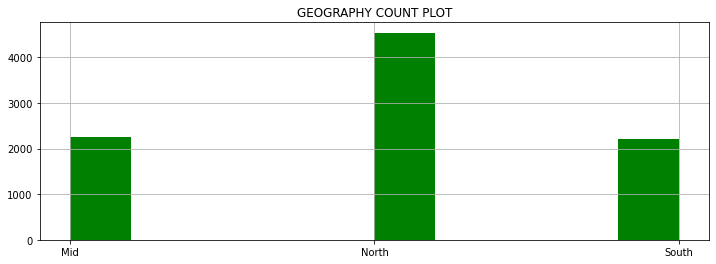

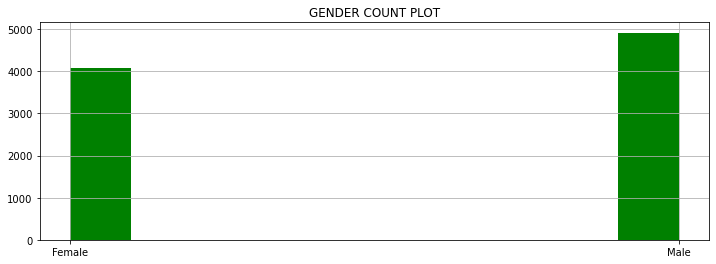

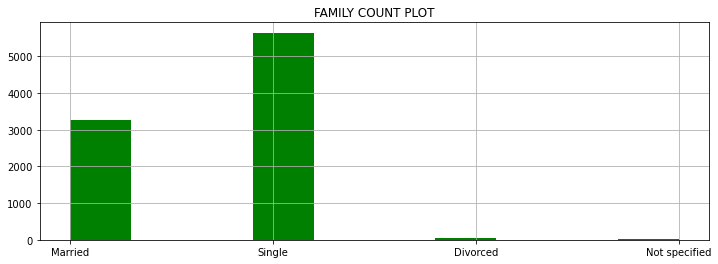

In [8]:
cat = ['Geography','Gender','Family']
for i in cat:
    df[i].hist(color = 'Green',figsize = (12,4))
    plt.title(f'{i.upper()} COUNT PLOT')
    plt.show()

- In the dataset, the number of people open accounts in the North side makes up the majority (more than 4000 people). There is no significant difference in the number of people open accounts in the Mid side and the South side.
- In the dataset, the number of female customers (about 4000 people) is less than the number of male customers (about 5000 people). There is not too much difference between the number of male and female customers
- In the data set, the number of single customers is the majority with more than 5000 people. Followed by married customers with more than 3000 people. Customers who are divorced or have not specified their marital status account for a very small percentage.

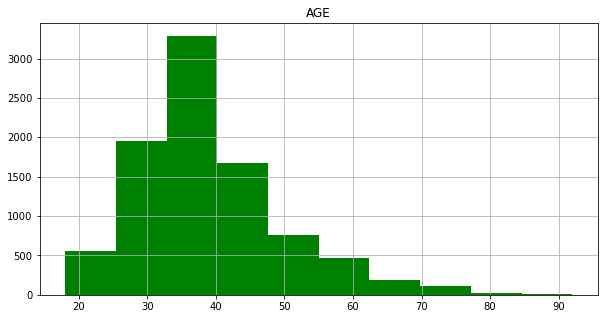

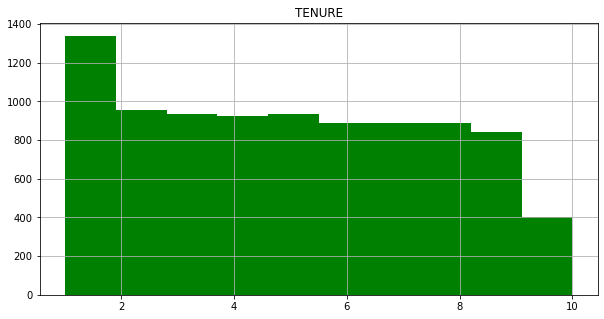

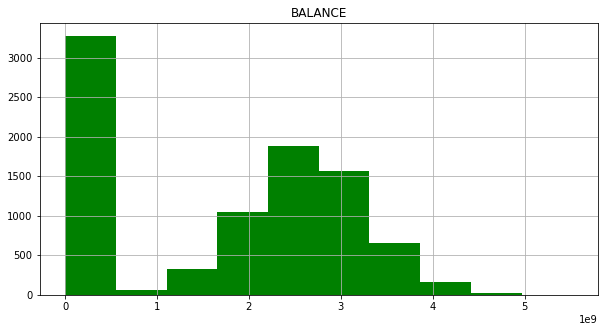

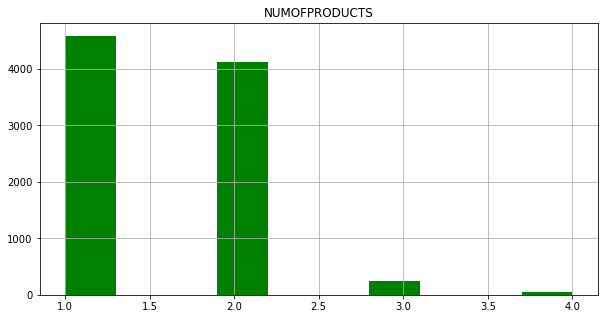

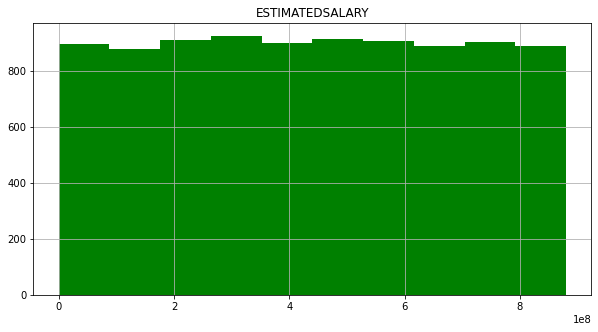

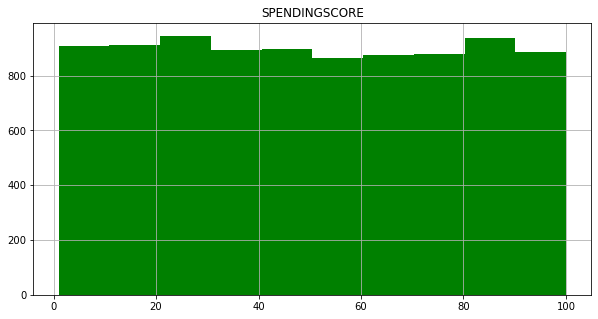

In [9]:
for i in df.columns[1:]:
    if not i in cat and i!='Exited':
        df[i].hist(color = 'Green',figsize = (10,5))
        plt.title(f'{i.upper()}')
        plt.show()

- The distribution of age variable is skewed to the left when the majority of customers in the dataset are between 30 and 40 years old. In addition, there are some very old customers between 70 and 90 years old.
- There are a large number of customers with no money in their accounts (balance = 0).
- Most of customers are utilising 1 or 2 bank products.
- The number of customers distributed at each credit score level is the same, there is no significant difference. Spending score variable shows the same thing.

***Now comes the target variable.***

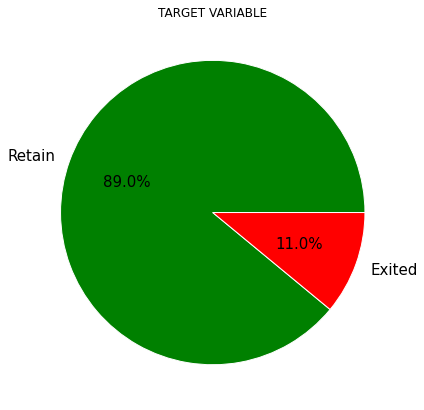

In [10]:
fig = plt.figure(figsize =(10, 7))
plt.pie(df['Exited'].value_counts(), labels = ["Retain","Exited"], colors = ['Green','r']
        , autopct='%.1f%%' ,textprops={'fontsize': 15},
        wedgeprops={'edgecolor': 'white', 'linewidth': 1})
plt.title('TARGET VARIABLE');

It can be seen from the pie chart that Customers who closed their accounts account for only about 11%, the rest are customers who still retain their accounts. This dataset is imbalance.

***I will draw graphs showing the relationship between target variable and numeric variables.***

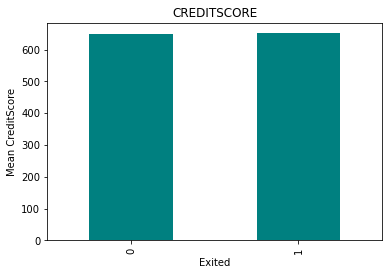

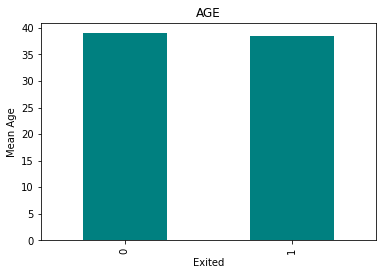

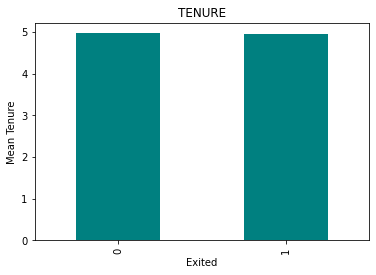

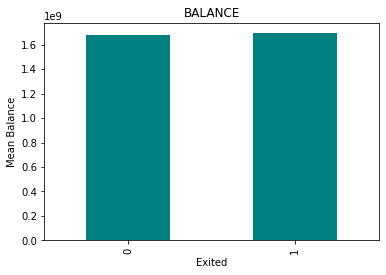

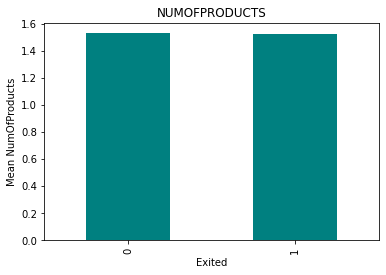

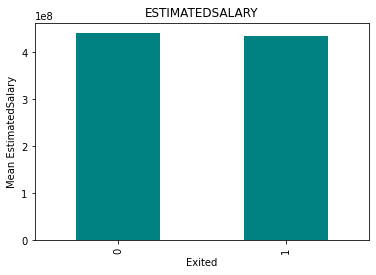

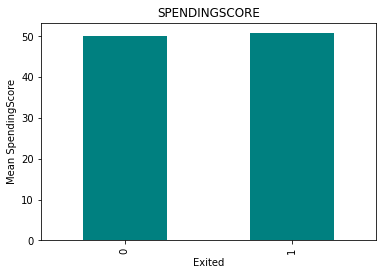

In [11]:
for i in df.columns:
    if not i in cat and i!= 'Exited':
        df.groupby('Exited')[i].mean().plot(kind='bar',color = 'teal')
        plt.title(i.upper())
        plt.ylabel(f'Mean {i}')
        plt.show()

It is quite difficult to draw conclusions from the above graphs. So let's perform by number to have a closer look.

In [12]:
for i in df.columns:
    if not i in cat and i!= 'Exited':
         print(df.groupby('Exited')[i].mean())

Exited
0    650.184247
1    651.202224
Name: CreditScore, dtype: float64
Exited
0    38.960305
1    38.393327
Name: Age, dtype: float64
Exited
0    4.969542
1    4.949444
Name: Tenure, dtype: float64
Exited
0    1.676769e+09
1    1.692688e+09
Name: Balance, dtype: float64
Exited
0    1.529272
1    1.525784
Name: NumOfProducts, dtype: float64
Exited
0    4.404996e+08
1    4.341829e+08
Name: EstimatedSalary, dtype: float64
Exited
0    50.212458
1    50.767442
Name: SpendingScore, dtype: float64


There is almost no significant difference between the two groups of customers retained and exited in all of the above variables. The relationship of the target variable and those variables is also not clear.

In [13]:
for i in cat:
    print(pd.DataFrame(df.groupby('Exited')[i].value_counts()))

                  Geography
Exited Geography           
0      North           4074
       South           1973
       Mid             1964
1      North            467
       Mid              280
       South            242
               Gender
Exited Gender        
0      Male      4340
       Female    3671
1      Male       578
       Female     411
                      Family
Exited Family               
0      Single           5048
       Married          2883
       Divorced           52
       Not specified      28
1      Single            596
       Married           381
       Divorced            7
       Not specified       5


In each category variable, considering each category of the variable, the percentage of customers distributed into each class is almost equal to the percentage of customers distributed into corresponding class on the entire data set (about 89% for those retain, 11% for exited customers).

# One - hot Encoding

In [14]:
df_final = pd.get_dummies(df,columns=cat,drop_first=True)

In [15]:
df_final

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,SpendingScore,Exited,Geography_North,Geography_South,Gender_Male,Family_Married,Family_Not specified,Family_Single
0,666,44,2,2690919000,1,301729000,18,0,0,0,0,1,0,0
1,597,22,4,2233629000,1,310328000,45,0,0,0,0,0,0,1
2,655,39,6,2081888000,2,655373000,12,0,1,0,0,1,0,0
3,707,40,5,0,2,180632000,49,0,1,0,0,0,0,1
4,661,38,7,3146147000,1,68864000,44,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,850,22,4,2014333000,2,46382000,44,1,0,0,1,1,0,0
8996,735,53,8,2724598000,2,750002000,22,0,1,0,0,0,0,1
8997,631,36,1,0,2,585822000,33,0,1,0,1,0,0,1
8998,792,25,7,3142969000,1,574812000,28,0,0,1,1,0,0,1


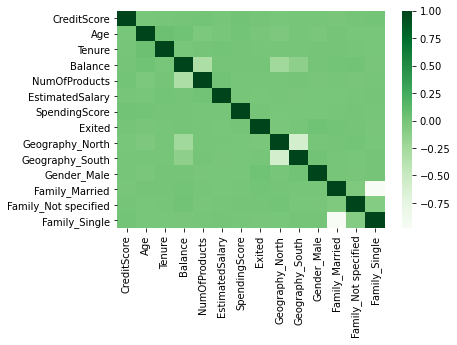

In [16]:
sns.heatmap(df_final.corr(),cmap = 'Greens')

There is no obvious correlation between variables because the correlation coefficient mostly fluctuates around 0.

# Splitting the data

In [17]:
X = df_final.drop(['Exited'],axis=1)
y=df_final['Exited']

In [18]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=0)

# Make predictions with models

I choose 3 models:
- Random Forest
    1. Less prone to overfitting than Decision Tree and other algorithms.
    2. Works well with non-linear data.
    3. Handle big data with numerous variables running into thousands.
- Logistic Regression
    1. Easier to implement, interpret, and very efficient to train.
    2. More accurate for simple data.
    3. Less prone to overfitting.
- K - Nearest Neighbors Classifier
    1. Easy to implement.
    2. Low computational complexity.
    3. Flexible with multi-class problems.

Input data to tree - based model such as or Random Forest do not need to scale. So I will do it first.

Now I will find the optimal n_estimators for the Random Forest model.

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(random_state = 0) 
n_range = [10,20,50,100,150,200]
param_grid = dict(n_estimators=n_range)
grid_rf = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_rf.fit(X_train,y_train)
print("Random Forest tuned hyperparameters :(best parameters) ",grid_rf.best_params_)

Random Forest tuned hyperparameters :(best parameters)  {'n_estimators': 200}


The best value for n_estimators is 200.

C:\Users\Khang Lam\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Khang Lam\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Khang Lam\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contro

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1606
           1       0.00      0.00      0.00       194

    accuracy                           0.89      1800
   macro avg       0.45      0.50      0.47      1800
weighted avg       0.80      0.89      0.84      1800

Random Forest Accuracy: 89.0%


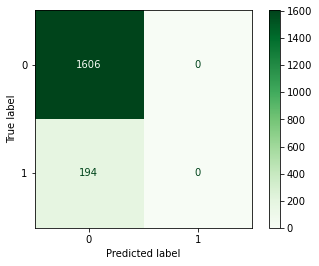

In [20]:
y_pred = grid_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(grid_rf, X_test, y_test,cmap='Greens')
print(classification_report(y_test, y_pred))
print(f'Random Forest Accuracy: {100*round(accuracy_score(y_test, y_pred),2)}%')

The accuracy rate is quite good but the model can not predict the customers that is actually exited as a result of imbalanced dataset.

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\Khang Lam\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Khang Lam\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Khang Lam\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contro

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1606
           1       0.00      0.00      0.00       194

    accuracy                           0.89      1800
   macro avg       0.45      0.50      0.47      1800
weighted avg       0.80      0.89      0.84      1800

Logistic Accuracy: 89.0%


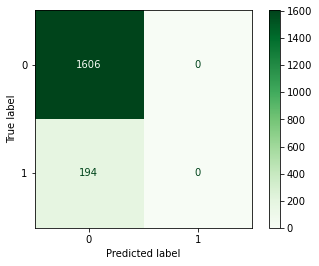

In [22]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
model_lg = classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(model_lg, X_test, y_test,cmap='Greens')
print(classification_report(y_test, y_pred))
print(f'Logistic Accuracy: {100*round(accuracy_score(y_test, y_pred),2)}%')

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier() 
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid_knn = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_knn.fit(X_train,y_train)
print("Tuned hyperparameters :(best parameters) ",grid_knn.best_params_)

Tuned hyperparameters :(best parameters)  {'n_neighbors': 10}


The best value for n_neighbors is 10.

C:\Users\Khang Lam\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1606
           1       0.00      0.00      0.00       194

    accuracy                           0.89      1800
   macro avg       0.45      0.50      0.47      1800
weighted avg       0.80      0.89      0.84      1800

KNN Accuracy: 89.0%


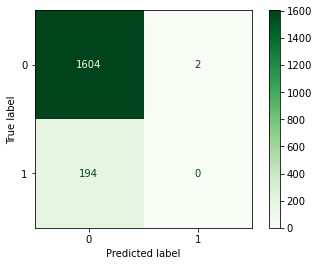

In [24]:
y_pred = grid_knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(grid_knn, X_test, y_test,cmap='Greens')
print(classification_report(y_test, y_pred))
print(f'KNN Accuracy: {100*round(accuracy_score(y_test, y_pred),2)}%')

The accuracy rate of the above models are quite good but the model can not predict the customers, just like random forest.

All the models are terribly affected by the imbalance dataset. Tunning hyperparameter can not bring back good results.

***Let's see how the models perform on the test sample dataset***

In [25]:
df_test = pd.read_csv('E:\Lam Nhut Thinh\Machine Learning\\test_sample_data.csv')

In [26]:
df_test

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,SpendingScore,Family,Exited
0,15771442,633,North,Male,40,4,3312716000,1,152551000,45,Single,0
1,15700174,733,South,Female,30,1,1833024000,1,254184000,38,Single,0
2,15747503,705,South,Male,44,1,4060147000,1,302985000,39,Single,0
3,15599433,660,Mid,Male,35,8,1290111000,1,874166000,97,Single,0
4,15763194,643,North,Male,34,7,0,2,441338000,21,Married,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,15595883,540,Mid,Male,39,4,2800123000,1,71061000,85,Married,0
996,15790599,756,Mid,Female,39,5,3285989000,2,480033000,78,Married,0
997,15665087,595,Mid,Female,26,8,2608050000,1,665246000,93,Single,1
998,15660602,464,Mid,Male,33,8,3614264000,2,16325000,15,Single,0


In [27]:
df_test = df_test.drop('CustomerId',axis=1)
df_test

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,SpendingScore,Family,Exited
0,633,North,Male,40,4,3312716000,1,152551000,45,Single,0
1,733,South,Female,30,1,1833024000,1,254184000,38,Single,0
2,705,South,Male,44,1,4060147000,1,302985000,39,Single,0
3,660,Mid,Male,35,8,1290111000,1,874166000,97,Single,0
4,643,North,Male,34,7,0,2,441338000,21,Married,0
...,...,...,...,...,...,...,...,...,...,...,...
995,540,Mid,Male,39,4,2800123000,1,71061000,85,Married,0
996,756,Mid,Female,39,5,3285989000,2,480033000,78,Married,0
997,595,Mid,Female,26,8,2608050000,1,665246000,93,Single,1
998,464,Mid,Male,33,8,3614264000,2,16325000,15,Single,0


In [28]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CreditScore      1000 non-null   int64 
 1   Geography        1000 non-null   object
 2   Gender           1000 non-null   object
 3   Age              1000 non-null   int64 
 4   Tenure           1000 non-null   int64 
 5   Balance          1000 non-null   int64 
 6   NumOfProducts    1000 non-null   int64 
 7   EstimatedSalary  1000 non-null   int64 
 8   SpendingScore    1000 non-null   int64 
 9   Family           1000 non-null   object
 10  Exited           1000 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 86.1+ KB


In [29]:
df_test.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,SpendingScore,Exited
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.00000,1.000000e+03,1000.000000,1000.000000
mean,652.623000,39.136000,4.863000,1.720227e+09,1.54200,4.457210e+08,50.143000,0.116000
std,94.025942,10.551248,2.752782,1.367224e+09,0.58701,2.504932e+08,29.196215,0.320385
min,363.000000,18.000000,1.000000,0.000000e+00,1.00000,9.520000e+05,1.000000,0.000000
25%,591.000000,32.000000,2.000000,0.000000e+00,1.00000,2.305005e+08,24.000000,0.000000
50%,656.000000,38.000000,5.000000,2.130871e+09,1.50000,4.474930e+08,50.500000,0.000000
75%,717.000000,44.000000,7.000000,2.827264e+09,2.00000,6.597908e+08,75.000000,0.000000
max,850.000000,78.000000,10.000000,4.873722e+09,4.00000,8.778240e+08,100.000000,1.000000


In [30]:
df_test = pd.get_dummies(df_test,columns=cat,drop_first=True)

In [31]:
X_sample = df_test.drop(['Exited'],axis=1)
y_sample=df_test['Exited']

C:\Users\Khang Lam\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Khang Lam\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Khang Lam\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contro

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       884
           1       0.00      0.00      0.00       116

    accuracy                           0.88      1000
   macro avg       0.44      0.50      0.47      1000
weighted avg       0.78      0.88      0.83      1000

Random Forest Accuracy: 88.0%


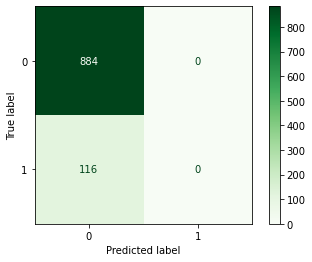

In [32]:
y_pred = grid_rf.predict(X_sample)
cm = confusion_matrix(y_sample, y_pred)
plot_confusion_matrix(grid_rf, X_sample, y_sample,cmap='Greens')
print(classification_report(y_sample, y_pred))
print(f'Random Forest Accuracy: {100*round(accuracy_score(y_sample, y_pred),2)}%')

C:\Users\Khang Lam\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\Khang Lam\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Khang Lam\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\Khang Lam\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       884
           1       0.00      0.00      0.00       116

    accuracy                           0.88      1000
   macro avg       0.44      0.50      0.47      1000
weighted avg       0.78      0.88      0.83      1000

Logistic Regression Accuracy: 88.0%


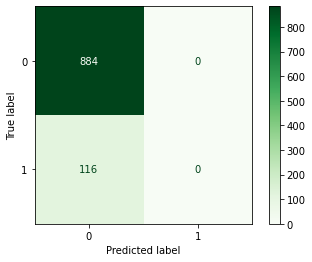

In [33]:
y_pred = model_lg.predict(X_sample)
cm = confusion_matrix(y_sample, y_pred)
plot_confusion_matrix(model_lg, X_sample, y_sample,cmap='Greens')
print(classification_report(y_sample, y_pred))
print(f'Logistic Regression Accuracy: {100*round(accuracy_score(y_sample, y_pred),2)}%')

C:\Users\Khang Lam\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\Khang Lam\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Khang Lam\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\Khang Lam\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       884
           1       0.00      0.00      0.00       116

    accuracy                           0.88      1000
   macro avg       0.44      0.50      0.47      1000
weighted avg       0.78      0.88      0.83      1000

KNN Accuracy: 88.0%


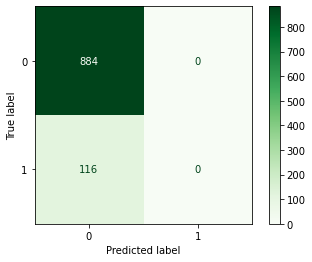

In [34]:
y_pred = grid_knn.predict(X_sample)
cm = confusion_matrix(y_sample, y_pred)
plot_confusion_matrix(grid_knn, X_sample, y_sample,cmap='Greens')
print(classification_report(y_sample, y_pred))
print(f'KNN Accuracy: {100*round(accuracy_score(y_sample, y_pred),2)}%')

When models make predictions on test sample data, they also encounter the same situation. Exited customers can not be realized! The training data is horribly imbalance! We need to improve the recall (class 1) because  high recall means that we can predict almost case of customers that close the bank account.

***Solution***

I will resample the dataset for training model by increasing numbers of exited customers. This can help the training dataset is more balance and can improve the performance of the models.

In [35]:
df_major = df_final[df_final.Exited==0]
df_minor = df_final[df_final.Exited==1]

In [36]:
from sklearn.utils import resample

df_minor_upsampled = resample(df_minor, 
                                 replace=True,                      
                                 n_samples= df_major.shape[0],
                                 random_state=0)

In [37]:
df_up = pd.concat([df_minor_upsampled, df_major])

So let's retrain the models.

In [38]:
X_up=df_up.drop(['Exited'],axis=1)
y_up=df_up['Exited']

In [39]:
X_train_up, X_test_up, y_train_up, y_test_up=train_test_split(X_up,y_up,test_size=0.2, random_state=0)

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(random_state = 0) 
n_range = [10,20,50,100,150,200]
param_grid = dict(n_estimators=n_range)
grid_rf_up = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_rf_up.fit(X_train_up,y_train_up)
print("Random Forest tuned hyperparameters :(best parameters) ",grid_rf.best_params_)

Random Forest tuned hyperparameters :(best parameters)  {'n_estimators': 200}


C:\Users\Khang Lam\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1632
           1       0.99      1.00      1.00      1573

    accuracy                           1.00      3205
   macro avg       1.00      1.00      1.00      3205
weighted avg       1.00      1.00      1.00      3205

Random Forest Accuracy: 100.0%


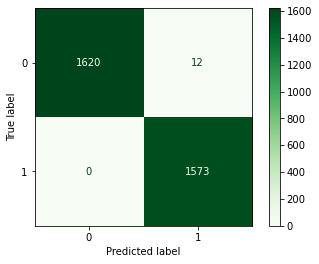

In [41]:
y_pred = grid_rf_up.predict(X_test_up)
cm = confusion_matrix(y_test_up, y_pred)
plot_confusion_matrix(grid_rf_up, X_test_up, y_test_up,cmap='Greens')
print(classification_report(y_test_up, y_pred))
print(f'Random Forest Accuracy: {100*round(accuracy_score(y_test_up, y_pred),2)}%')

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_up = sc.fit_transform(X_train_up)
X_test_up = sc.transform(X_test_up)

C:\Users\Khang Lam\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.54      0.55      0.54      1632
           1       0.52      0.51      0.51      1573

    accuracy                           0.53      3205
   macro avg       0.53      0.53      0.53      3205
weighted avg       0.53      0.53      0.53      3205

Logistic Accuracy: 53.0%


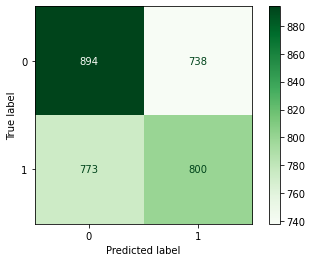

In [43]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
model_lg = classifier.fit(X_train_up, y_train_up)
y_pred = classifier.predict(X_test_up)
cm = confusion_matrix(y_test_up, y_pred)
plot_confusion_matrix(model_lg, X_test_up, y_test_up,cmap='Greens')
print(classification_report(y_test_up, y_pred))
print(f'Logistic Accuracy: {100*round(accuracy_score(y_test_up, y_pred),2)}%')

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier() 
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid_knn_up = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_knn_up.fit(X_train_up,y_train_up)
print("Tuned hyperparameters :(best parameters) ",grid_knn.best_params_)

Tuned hyperparameters :(best parameters)  {'n_neighbors': 10}


C:\Users\Khang Lam\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       1.00      0.86      0.92      1632
           1       0.87      1.00      0.93      1573

    accuracy                           0.93      3205
   macro avg       0.94      0.93      0.93      3205
weighted avg       0.94      0.93      0.93      3205

KNN Accuracy: 93.0%


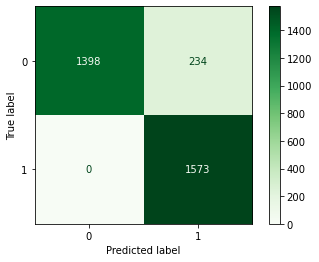

In [45]:
y_pred = grid_knn_up.predict(X_test_up)
cm = confusion_matrix(y_test_up, y_pred)
plot_confusion_matrix(grid_knn_up, X_test_up, y_test_up,cmap='Greens')
print(classification_report(y_test_up, y_pred))
print(f'KNN Accuracy: {100*round(accuracy_score(y_test_up, y_pred),2)}%')

In this case, Random Forest and KNN models perform really well with 100% (!) and 93% accuracy respectively, Logistic Regression's accuracy rate is decrease. But all the model can increase the recall (class 1).

***Now try again with the test sample data***

C:\Users\Khang Lam\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.89      1.00      0.94       884
           1       0.40      0.02      0.03       116

    accuracy                           0.88      1000
   macro avg       0.64      0.51      0.49      1000
weighted avg       0.83      0.88      0.83      1000

Random Forest Accuracy: 88.0%


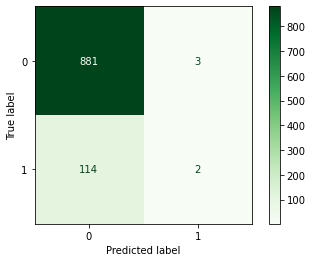

In [46]:
y_pred = grid_rf_up.predict(X_sample)
cm = confusion_matrix(y_sample, y_pred)
plot_confusion_matrix(grid_rf_up, X_sample, y_sample,cmap='Greens')
print(classification_report(y_sample, y_pred))
print(f'Random Forest Accuracy: {100*round(accuracy_score(y_sample, y_pred),2)}%')

C:\Users\Khang Lam\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\Khang Lam\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Khang Lam\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\Khang Lam\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       884
           1       0.00      0.00      0.00       116

    accuracy                           0.88      1000
   macro avg       0.44      0.50      0.47      1000
weighted avg       0.78      0.88      0.83      1000

Logistic Regression Accuracy: 88.0%


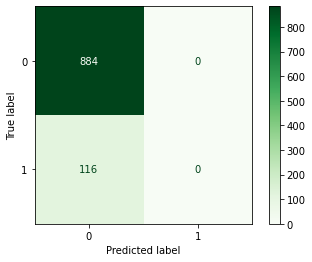

In [47]:
y_pred = model_lg.predict(X_sample)
cm = confusion_matrix(y_sample, y_pred)
plot_confusion_matrix(model_lg, X_sample, y_sample,cmap='Greens')
print(classification_report(y_sample, y_pred))
print(f'Logistic Regression Accuracy: {100*round(accuracy_score(y_sample, y_pred),2)}%')

C:\Users\Khang Lam\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\Khang Lam\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Khang Lam\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\Khang Lam\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       884
           1       0.00      0.00      0.00       116

    accuracy                           0.88      1000
   macro avg       0.44      0.50      0.47      1000
weighted avg       0.78      0.88      0.83      1000

KNN Accuracy: 88.0%


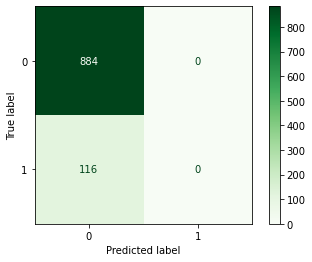

In [48]:
y_pred = grid_knn_up.predict(X_sample)
cm = confusion_matrix(y_sample, y_pred)
plot_confusion_matrix(grid_knn_up, X_sample, y_sample,cmap='Greens')
print(classification_report(y_sample, y_pred))
print(f'KNN Accuracy: {100*round(accuracy_score(y_sample, y_pred),2)}%')

The old problem repeated on the test sample data!!! Customers leaving the bank still can not be realized by the model!!! The accuracy rate almost unchanged.

# Conclusion

After analysing and applying predictive model on 2 datasets, there are some conclusions that can be drawn as follows:
- Imbalance dataset cause difficulties in the prediction of the models.
- Accuracy rate is not the only metric for evaluating models. High accuracy does not mean that your model is good. It based on your problem is and what you expect the model.
- Creating a good model is not easy, it not just copy the code and paste. Especially in real world with real data and various kind of business problems! For instance, the KNN model and Random Forest have good performance on the upsampled dataset but still can not improve predictive efficiency on the test sample data. I think that we need some more advanced method to solve this problem such as feature engineering or deep learning.